<img align="center" src="figures/course.png" width="800">

#                                    16720 (B) Neural Networks for Recognition - Assignment 3

     Instructor: Kris Kitani                       TAs: Arka, Jinkun, Rawal, Rohan, Sheng-Yu

## Q2 Training Models (20 points)

Please download relevant data for this question by running the script, `./scripts/get_data.sh`. This will use `wget` and `unzip` to download 

http://www.cs.cmu.edu/~lkeselma/16720a_data/data.zip


http://www.cs.cmu.edu/~lkeselma/16720a_data/images.zip

and extract them to **data** and **image** folders


- Our input images are $32\times 32$ in size, please flatten them into one 1024 dimensional vector.
- We will multiply this vector by $\textbf{W}^{(1)}$, each row of $\textbf{W}^{(1)}$ can be seen as a weight image. 
- Reshaping each row into a $32\times 32$ image gives us an idea of what types of images each unit in the hidden layer has a high response to.

We have provided you three data **.mat** files to use for this section. The training data in **nist36\_train.mat** contains samples for each of the 26 upper-case letters of the alphabet and the 10 digits. This is the set you should use for training your network. The cross-validation set in **nist36\_valid.mat** contains samples from each class, and should be used in the training loop to see how the network is performing on data that it is not training on. This will help to spot over fitting. Finally, the test data in **nist36\_test.mat** contains testing data, and should be used for the final evaluation on your best model to see how well it will generalize to new unseen data.

### Q2.1 (8 points, write-up)
Train a network from scratch. Use a single hidden layer with 64 hidden units, and train for at least 30 epochs.

**Modify** the script to generate two plots: one showing the accuracy on both the training and validation set over the epochs, and the other showing the cross-entropy loss averaged over the data. The x-axis should represent the epoch number, while the y-axis represents the accuracy or loss. 

With these settings, you should see an accuracy on the validation set of at least 70\%.

Please submit to writeup, 1) iter vs loss, 2) iter vs acc as plot and the 3) final validation accuracy.

<font color="red">**Please include your answer to HW3:PDF**</font>

<font color="red">**For this question, please also submit screenshot of your code snippets to the write-up**</font>

In [2]:
import numpy as np
import pickle
import scipy.io
from ipynb.fs.defs.q1 import *

acc =  0.08129629629629635
itr: 00 	 loss: 10.57 	 acc : 0.08
Validation accuracy:  0.15694444444444444
acc =  0.23296296296295765
Validation accuracy:  0.3211111111111111
acc =  0.349814814814805
itr: 02 	 loss: 9.12 	 acc : 0.35
Validation accuracy:  0.4036111111111111
acc =  0.4281481481481352
Validation accuracy:  0.4538888888888889
acc =  0.48722222222220696
itr: 04 	 loss: 7.45 	 acc : 0.49
Validation accuracy:  0.5030555555555556
acc =  0.5290740740740623
Validation accuracy:  0.5341666666666667
acc =  0.5609259259259183
itr: 06 	 loss: 6.18 	 acc : 0.56
Validation accuracy:  0.5588888888888889
acc =  0.5822222222222172
Validation accuracy:  0.5775
acc =  0.5995370370370333
itr: 08 	 loss: 5.32 	 acc : 0.60
Validation accuracy:  0.5886111111111111
acc =  0.6146296296296277
Validation accuracy:  0.6002777777777778
acc =  0.6281481481481468
itr: 10 	 loss: 4.73 	 acc : 0.63
Validation accuracy:  0.6091666666666666
acc =  0.6392592592592591
Validation accuracy:  0.62
acc =  0.64907

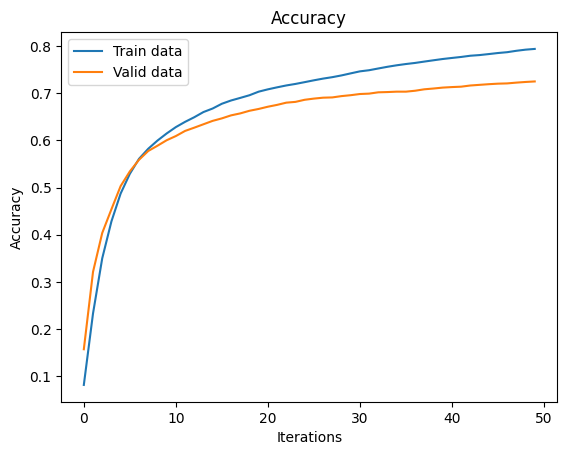

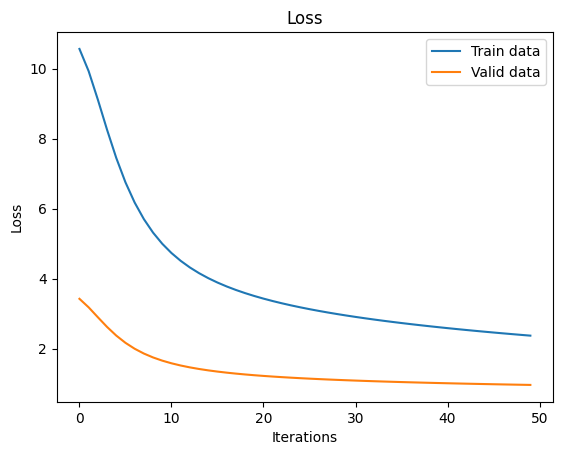

In [9]:
import math
train_data = scipy.io.loadmat('data/nist36_train.mat')
valid_data = scipy.io.loadmat('data/nist36_valid.mat')

train_x, train_y = train_data['train_data'], train_data['train_labels']
valid_x, valid_y = valid_data['valid_data'], valid_data['valid_labels']

max_iters = 50
# pick a batch size, learning rate
batch_size = 3
learning_rate = 1e-3
# YOUR CODE HERE

# raise NotImplementedError()
hidden_size = 64

batches = get_random_batches(train_x,train_y,batch_size)
batch_num = len(batches)

params = {}

# initialize layers (named "layer1" and "output") here
# YOUR CODE HERE
initialize_weights(1024,hidden_size,params,'layer1')
initialize_weights(hidden_size,36,params,'output')
# raise NotImplementedError()
train_acc_arr = []
train_loss_arr = []
valid_acc_arr = []
valid_loss_arr = []
itr_arr = []
# with default settings, you should get loss < 150 and accuracy > 80%
for itr in range(max_iters):
    itr_arr.append(itr)
    total_loss = 0
    total_acc = 0
    valid_loss = 0
    valid_acc = 0
    for xb,yb in batches:
        # print("xb shape = ",xb.shape)
        # training loop can be exactly the same as q2!
        # YOUR CODE HERE
        post_act = forward(xb,params,'layer1',sigmoid)
        pred_output = forward(post_act,params,'output',softmax)
        # raise NotImplementedError()
        
        # loss
        # be sure to add loss and accuracy to epoch totals
        # YOUR CODE HERE
        loss, acc = compute_loss_and_acc(yb, pred_output)
        total_loss += loss/len(batches)
        total_acc += acc/len(batches)
        
        # raise NotImplementedError()
        
        # backward
        # YOUR CODE HERE
        last_layer_backprop = backwards(pred_output - yb, params, 'output', linear_deriv)
        hidden_layer_backprop  = backwards(last_layer_backprop, params, 'layer1', sigmoid_deriv)
        # raise NotImplementedError()

        # apply gradient
        # YOUR CODE HERE
        params['Woutput'] = params['Woutput'] - learning_rate*params['grad_Woutput']
        params['boutput'] = params['boutput'] - learning_rate*params['grad_boutput']
        params['Wlayer1'] = params['Wlayer1'] - learning_rate*params['grad_Wlayer1']
        params['blayer1'] = params['blayer1'] - learning_rate*params['grad_blayer1']
            
        # raise NotImplementedError()
    print("acc = ", total_acc)
    train_acc_arr.append(total_acc)
    train_loss_arr.append(total_loss)
    if itr % 2 == 0:
        print("itr: {:02d} \t loss: {:.2f} \t acc : {:.2f}".format(itr,total_loss,total_acc))

# run on validation set and report accuracy! should be above 70%
    
    post_act = forward(valid_x,params,'layer1',sigmoid)
    pred_output = forward(post_act,params,'output',softmax)
    # raise NotImplementedError()

    # loss
    # be sure to add loss and accuracy to epoch totals
    # YOUR CODE HERE
    loss, acc = compute_loss_and_acc(valid_y, pred_output)
    valid_loss += loss/len(batches)
    valid_acc += acc
    valid_acc_arr.append(valid_acc)
    valid_loss_arr.append(valid_loss)
    # raise NotImplementedError()
    print('Validation accuracy: ',valid_acc)
    

import matplotlib.pyplot as plt
plt.plot(itr_arr,train_acc_arr, label = "Train data")
plt.plot(itr_arr,valid_acc_arr, label = "Valid data")
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.legend()
plt.title("Accuracy")
plt.show()

plt.plot(itr_arr,train_loss_arr, label = "Train data")
plt.plot(itr_arr,valid_loss_arr, label = "Valid data")
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()
plt.title("Loss")
plt.show()


In [6]:
with open ("q2_weights.pickle", "wb") as handle:
    pickle.dump(params, handle)

### Q2.2 (3 points, write-up)
Use your modified training script to train three networks, one with your best learning rate, one with 10 times that learning rate and one with one tenth that learning rate. Include all 6 plots in your writeup. Comment on how the learning rates affect the training, and report the final accuracy of the best network on the test set.

<font color="red">**Please include your answer to HW3:PDF**</font>

itr: 00 	 loss: 9.59 	 acc : 0.18
itr: 02 	 loss: 4.89 	 acc : 0.59
itr: 04 	 loss: 3.73 	 acc : 0.66
itr: 06 	 loss: 3.23 	 acc : 0.71
itr: 08 	 loss: 2.91 	 acc : 0.73
itr: 10 	 loss: 2.68 	 acc : 0.75
itr: 12 	 loss: 2.49 	 acc : 0.77
itr: 14 	 loss: 2.33 	 acc : 0.79
itr: 16 	 loss: 2.19 	 acc : 0.80
itr: 18 	 loss: 2.07 	 acc : 0.81
itr: 20 	 loss: 1.96 	 acc : 0.82
itr: 22 	 loss: 1.86 	 acc : 0.83
itr: 24 	 loss: 1.77 	 acc : 0.84
itr: 26 	 loss: 1.69 	 acc : 0.85
itr: 28 	 loss: 1.61 	 acc : 0.85
itr: 30 	 loss: 1.54 	 acc : 0.86
itr: 32 	 loss: 1.47 	 acc : 0.87
itr: 34 	 loss: 1.41 	 acc : 0.87
itr: 36 	 loss: 1.35 	 acc : 0.88
itr: 38 	 loss: 1.29 	 acc : 0.89
itr: 40 	 loss: 1.24 	 acc : 0.89
itr: 42 	 loss: 1.19 	 acc : 0.90
itr: 44 	 loss: 1.15 	 acc : 0.90
itr: 46 	 loss: 1.10 	 acc : 0.91
itr: 48 	 loss: 1.06 	 acc : 0.91
Test accuracy:  0.7694444444444445


ValueError: x and y must have same first dimension, but have shapes (50,) and (0,)

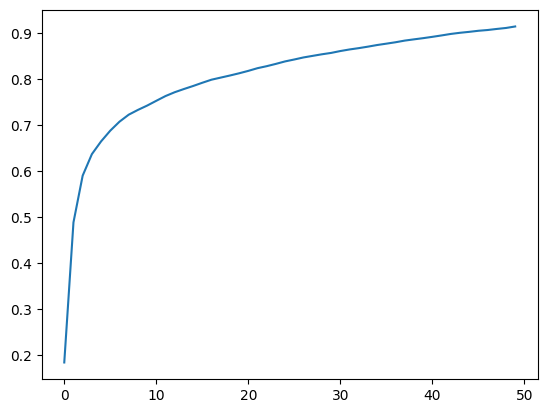

In [18]:
# Please put your code for Q3.2 here
# YOUR CODE HERE
train_data = scipy.io.loadmat('data/nist36_train.mat')
valid_data = scipy.io.loadmat('data/nist36_valid.mat')
test_data = scipy.io.loadmat('data/nist36_test.mat')

train_x, train_y = train_data['train_data'], train_data['train_labels']
valid_x, valid_y = valid_data['valid_data'], valid_data['valid_labels']
test_x, test_y = test_data['test_data'], test_data['test_labels']

max_iters = 50
# pick a batch size, learning rate
batch_size = 3
learning_rate = 5e-3
# YOUR CODE HERE

# raise NotImplementedError()
hidden_size = 64

batches = get_random_batches(train_x,train_y,batch_size)
batch_num = len(batches)

params = {}

# initialize layers (named "layer1" and "output") here
# YOUR CODE HERE
initialize_weights(1024,hidden_size,params,'layer1')
initialize_weights(hidden_size,36,params,'output')
np.save("w_init_layer1.npy", params['Wlayer1'])
np.save("w_init_output.npy", params['Woutput'])
# raise NotImplementedError()
train_acc_arr = []
train_loss_arr = []
valid_acc_arr = []
valid_loss_arr = []
test_acc_arr = []
test_loss_arr = []
itr_arr = []
# with default settings, you should get loss < 150 and accuracy > 80%
for itr in range(max_iters):
    itr_arr.append(itr)
    total_loss = 0
    total_acc = 0
    valid_loss = 0
    valid_acc = 0
    test_loss = 0
    test_acc = 0
    for xb,yb in batches:
        
        # training loop can be exactly the same as q2!
        # YOUR CODE HERE
        post_act = forward(xb,params,'layer1',sigmoid)
        pred_output = forward(post_act,params,'output',softmax)
        # raise NotImplementedError()
        
        # loss
        # be sure to add loss and accuracy to epoch totals
        # YOUR CODE HERE
        loss, acc = compute_loss_and_acc(yb, pred_output)
        total_loss += loss/len(batches)
        total_acc += acc/len(batches)
        
        # raise NotImplementedError()
        
        # backward
        # YOUR CODE HERE
        last_layer_backprop = backwards(pred_output - yb, params, 'output', linear_deriv)
        hidden_layer_backprop  = backwards(last_layer_backprop, params, 'layer1', sigmoid_deriv)
        # raise NotImplementedError()

        # apply gradient
        # YOUR CODE HERE
        params['Woutput'] = params['Woutput'] - learning_rate*params['grad_Woutput']
        params['boutput'] = params['boutput'] - learning_rate*params['grad_boutput']
        params['Wlayer1'] = params['Wlayer1'] - learning_rate*params['grad_Wlayer1']
        params['blayer1'] = params['blayer1'] - learning_rate*params['grad_blayer1']
            
        # raise NotImplementedError()
    train_acc_arr.append(total_acc)
    train_loss_arr.append(total_loss)
    if itr % 2 == 0:
        print("itr: {:02d} \t loss: {:.2f} \t acc : {:.2f}".format(itr,total_loss,total_acc))

# run on validation set and report accuracy! should be above 70%
    
    # post_act = forward(valid_x,params,'layer1',sigmoid)
    # pred_output = forward(post_act,params,'output',softmax)
    # # raise NotImplementedError()

    # # loss
    # # be sure to add loss and accuracy to epoch totals
    # # YOUR CODE HERE
    # loss, acc = compute_loss_and_acc(valid_y, pred_output)
    # valid_loss += loss/len(batches)
    # valid_acc += acc
    # valid_acc_arr.append(valid_acc)
    # valid_loss_arr.append(valid_loss)
    # # raise NotImplementedError()
    # print('Validation accuracy: ',valid_acc)

# run on Test set and report accuracy!
    
post_act = forward(test_x,params,'layer1',sigmoid)
pred_output = forward(post_act,params,'output',softmax)
# raise NotImplementedError()

# loss
# be sure to add loss and accuracy to epoch totals
# YOUR CODE HERE
loss, acc = compute_loss_and_acc(test_y, pred_output)
test_loss += loss/len(batches)
test_acc += acc
# test_acc_arr.append(valid_acc)
# test_loss_arr.append(valid_loss)
# raise NotImplementedError()
print('Test accuracy: ',test_acc)
    

import matplotlib.pyplot as plt
plt.plot(itr_arr,train_acc_arr, label = "Train data")
plt.plot(itr_arr,valid_acc_arr, label = "Valid data")
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.legend()
plt.title("Accuracy for learning rate = 50e-3")
plt.show()

plt.plot(itr_arr,train_loss_arr, label = "Train data")
plt.plot(itr_arr,valid_loss_arr, label = "Valid data")
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()
plt.title("Loss for learning rate = 50e-3")
plt.show()
# raise NotImplementedError()

### Q2.3 (2 points, write-up)
Visualize the first layer weights that your network learned. Compare these to the network weights immediately after initialization. Include both visualizations in your writeup. Comment on the learned weights. Do you notice any patterns?

<font color="red">**Please include your answer to HW3:PDF**</font>

NameError: name 'params' is not defined

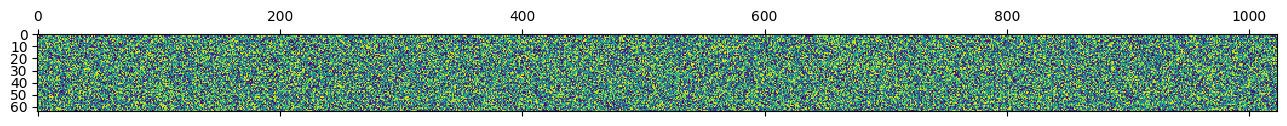

In [3]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
# Please put your code for Q3.3 here
# YOUR CODE HERE
w_init_layer1 = np.load("w_init_layer1.npy")
# w_init_output = np.load("w_init_output.npy")
plt.matshow(w_init_layer1.transpose())
plt.matshow(params["Wlayer1"].transpose())
# raise NotImplementedError()

### Q2.4 (3 points, write-up)
To visualize the deeper second layer we use the following method:

Given $y_1$ (size 64) as the output of the first layer and $y_2$ (size 36) as the output of the second layer. We will take a [one-hot encoding](https://en.wikipedia.org/wiki/One-hot) for any number $i$ in range $[0, 36)$ and multiply it with the transposed weight matrix of layer 2, $W_2^T$. Similarly multiply the output with $W_1^T$ to get back an array of the size of the input image (1024). Reshape and visualize the result.

For these values of $i$, additionally include the image in the validation set for which $y_2(i)$ attains it's maximum value.

<font color="red">**Please include your answer to HW3:PDF**</font>

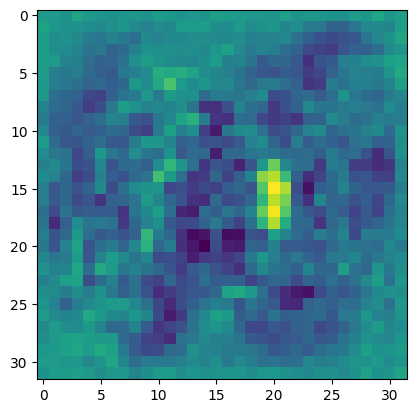

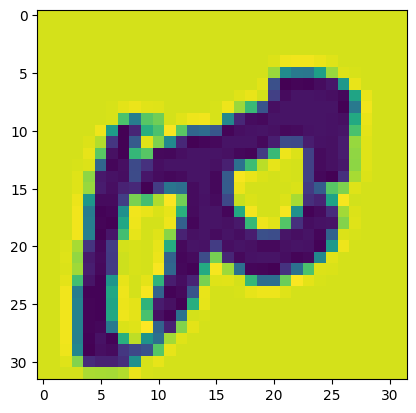

In [34]:
# Please put your code for Q3.4 here
# YOUR CODE HERE
i = np.zeros(36)
idx = 1
i[idx] = 1
W_out = params["Woutput"]
W_layer1 = params["Wlayer1"]
temp = np.matmul(i, W_out.transpose())
op = np.matmul(temp, W_layer1.transpose())
op = op.reshape((32,32))

img_idx = np.argmax(pred_output[:,idx])
img = test_x[img_idx].reshape((32,32))

plt.imshow(op)
plt.show()
plt.imshow(img)
# raise NotImplementedError()


### Q2.5 (4 points, write-up)
Visualize the confusion matrix for your best model for the test set. Comment on the top few pairs of classes that are most commonly confused.

<font color="red">**Please include your answer to HW3:PDF**</font>

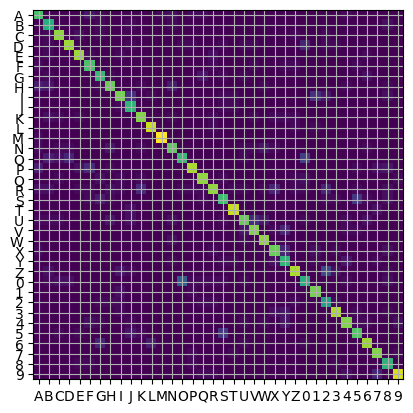

In [48]:
import matplotlib.pyplot as plt
confusion_matrix = np.zeros((train_y.shape[1],train_y.shape[1]))
# YOUR CODE HERE

true_labels = np.argmax(test_y, 1)
pred_labels = np.argmax(pred_output, 1)

# for i in range(true_labels.shape[0]):
for i in range(test_y.shape[0]):
    row_idx = pred_labels[i]
    col_idx = true_labels[i]
    confusion_matrix[row_idx][col_idx] += 1
    # true_labels = np.argmax(test_y[:,i])
    # pred_labels = np.argmax(pred_output[:,i])
# print(true_labels)

# raise NotImplementedError()
import string
plt.imshow(confusion_matrix,interpolation='nearest')
plt.grid(True)
plt.xticks(np.arange(36),string.ascii_uppercase[:26] + ''.join([str(_) for _ in range(10)]))
plt.yticks(np.arange(36),string.ascii_uppercase[:26] + ''.join([str(_) for _ in range(10)]))
plt.show()